# Data Acquisition and filtering

In [97]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
df=pd.read_csv("C:\\Users\\Administrator\\Downloads\\deepression.csv")

In [99]:
df.columns

Index(['Number ', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy', 'Depression State'],
      dtype='object')

In [100]:
df['Depression State'].unique()

array(['Mild', 'Moderate', 'Severe', 'No depression', '\tModerate',
       '\tMild', '\tNo depression', '\tSevere', '2\tNo depression',
       '5\tNo depression', nan], dtype=object)

In [101]:
df.isnull().sum()

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64

In [102]:
df.dropna(inplace=True)

In [103]:
df.shape

(540, 16)

# Data Exploration

In [104]:
df['Depression State'].unique()

array(['Mild', 'Moderate', 'Severe', 'No depression', '\tModerate',
       '\tMild', '\tNo depression', '\tSevere', '2\tNo depression',
       '5\tNo depression'], dtype=object)

In [105]:
df[df['Depression State']=='5\tNo depression']

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
491,492,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,5\tNo depression


In [106]:
df=df.dropna()

In [107]:
maps={"Mild":0,"Moderate":0,"Severe":1,"No depression":1,"\tModerate":0,"\tNo depression":1,"\tSevere":1,"2\tNo depression":1,"5\tNo depression":1}

In [108]:
df['Depression State']=df['Depression State'].map(maps)

In [109]:
df

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,0.0
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,536,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,5.0,0.0
536,537,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
537,538,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,2.0,1.0
538,539,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0


In [110]:
df['Depression State'].unique()

array([ 0.,  1., nan])

In [111]:
df.shape

(540, 16)

In [112]:
df.isnull().sum()

Number                0
Sleep                 0
Appetite              0
Interest              0
Fatigue               0
Worthlessness         0
Concentration         0
Agitation             0
Suicidal Ideation     0
Sleep Disturbance     0
Aggression            0
Panic Attacks         0
Hopelessness          0
Restlessness          0
Low Energy            0
Depression State     11
dtype: int64

In [113]:
df['Depression State'].describe()

count    529.000000
mean       0.551985
std        0.497761
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Depression State, dtype: float64

In [114]:
import matplotlib.pyplot as plt

(array([237.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 292.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

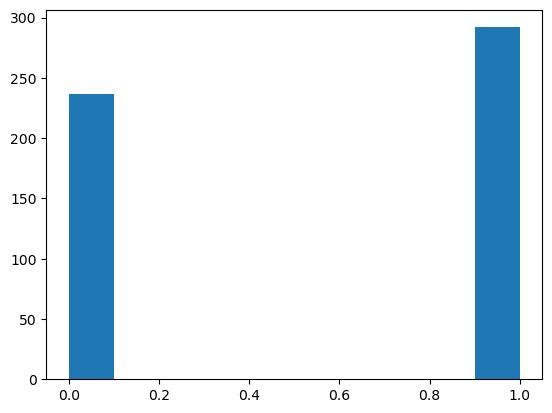

In [115]:
plt.hist(x=df['Depression State'])

In [116]:
df.fillna(method='ffill',inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4368\4116506308.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [117]:
df.isnull().sum()

Number               0
Sleep                0
Appetite             0
Interest             0
Fatigue              0
Worthlessness        0
Concentration        0
Agitation            0
Suicidal Ideation    0
Sleep Disturbance    0
Aggression           0
Panic Attacks        0
Hopelessness         0
Restlessness         0
Low Energy           0
Depression State     0
dtype: int64

(array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

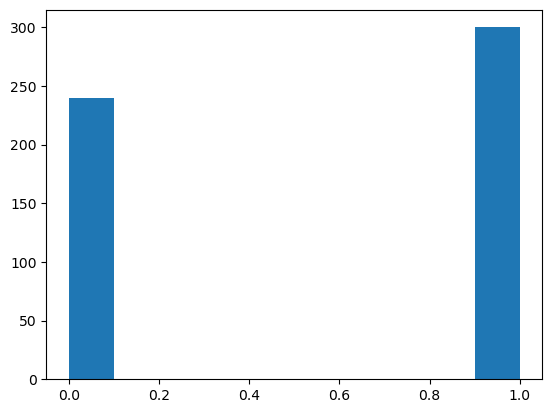

In [118]:
plt.hist(x=df['Depression State'])

# Data Validation & Cleansing


In [119]:
df.columns

Index(['Number ', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy', 'Depression State'],
      dtype='object')

In [120]:
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

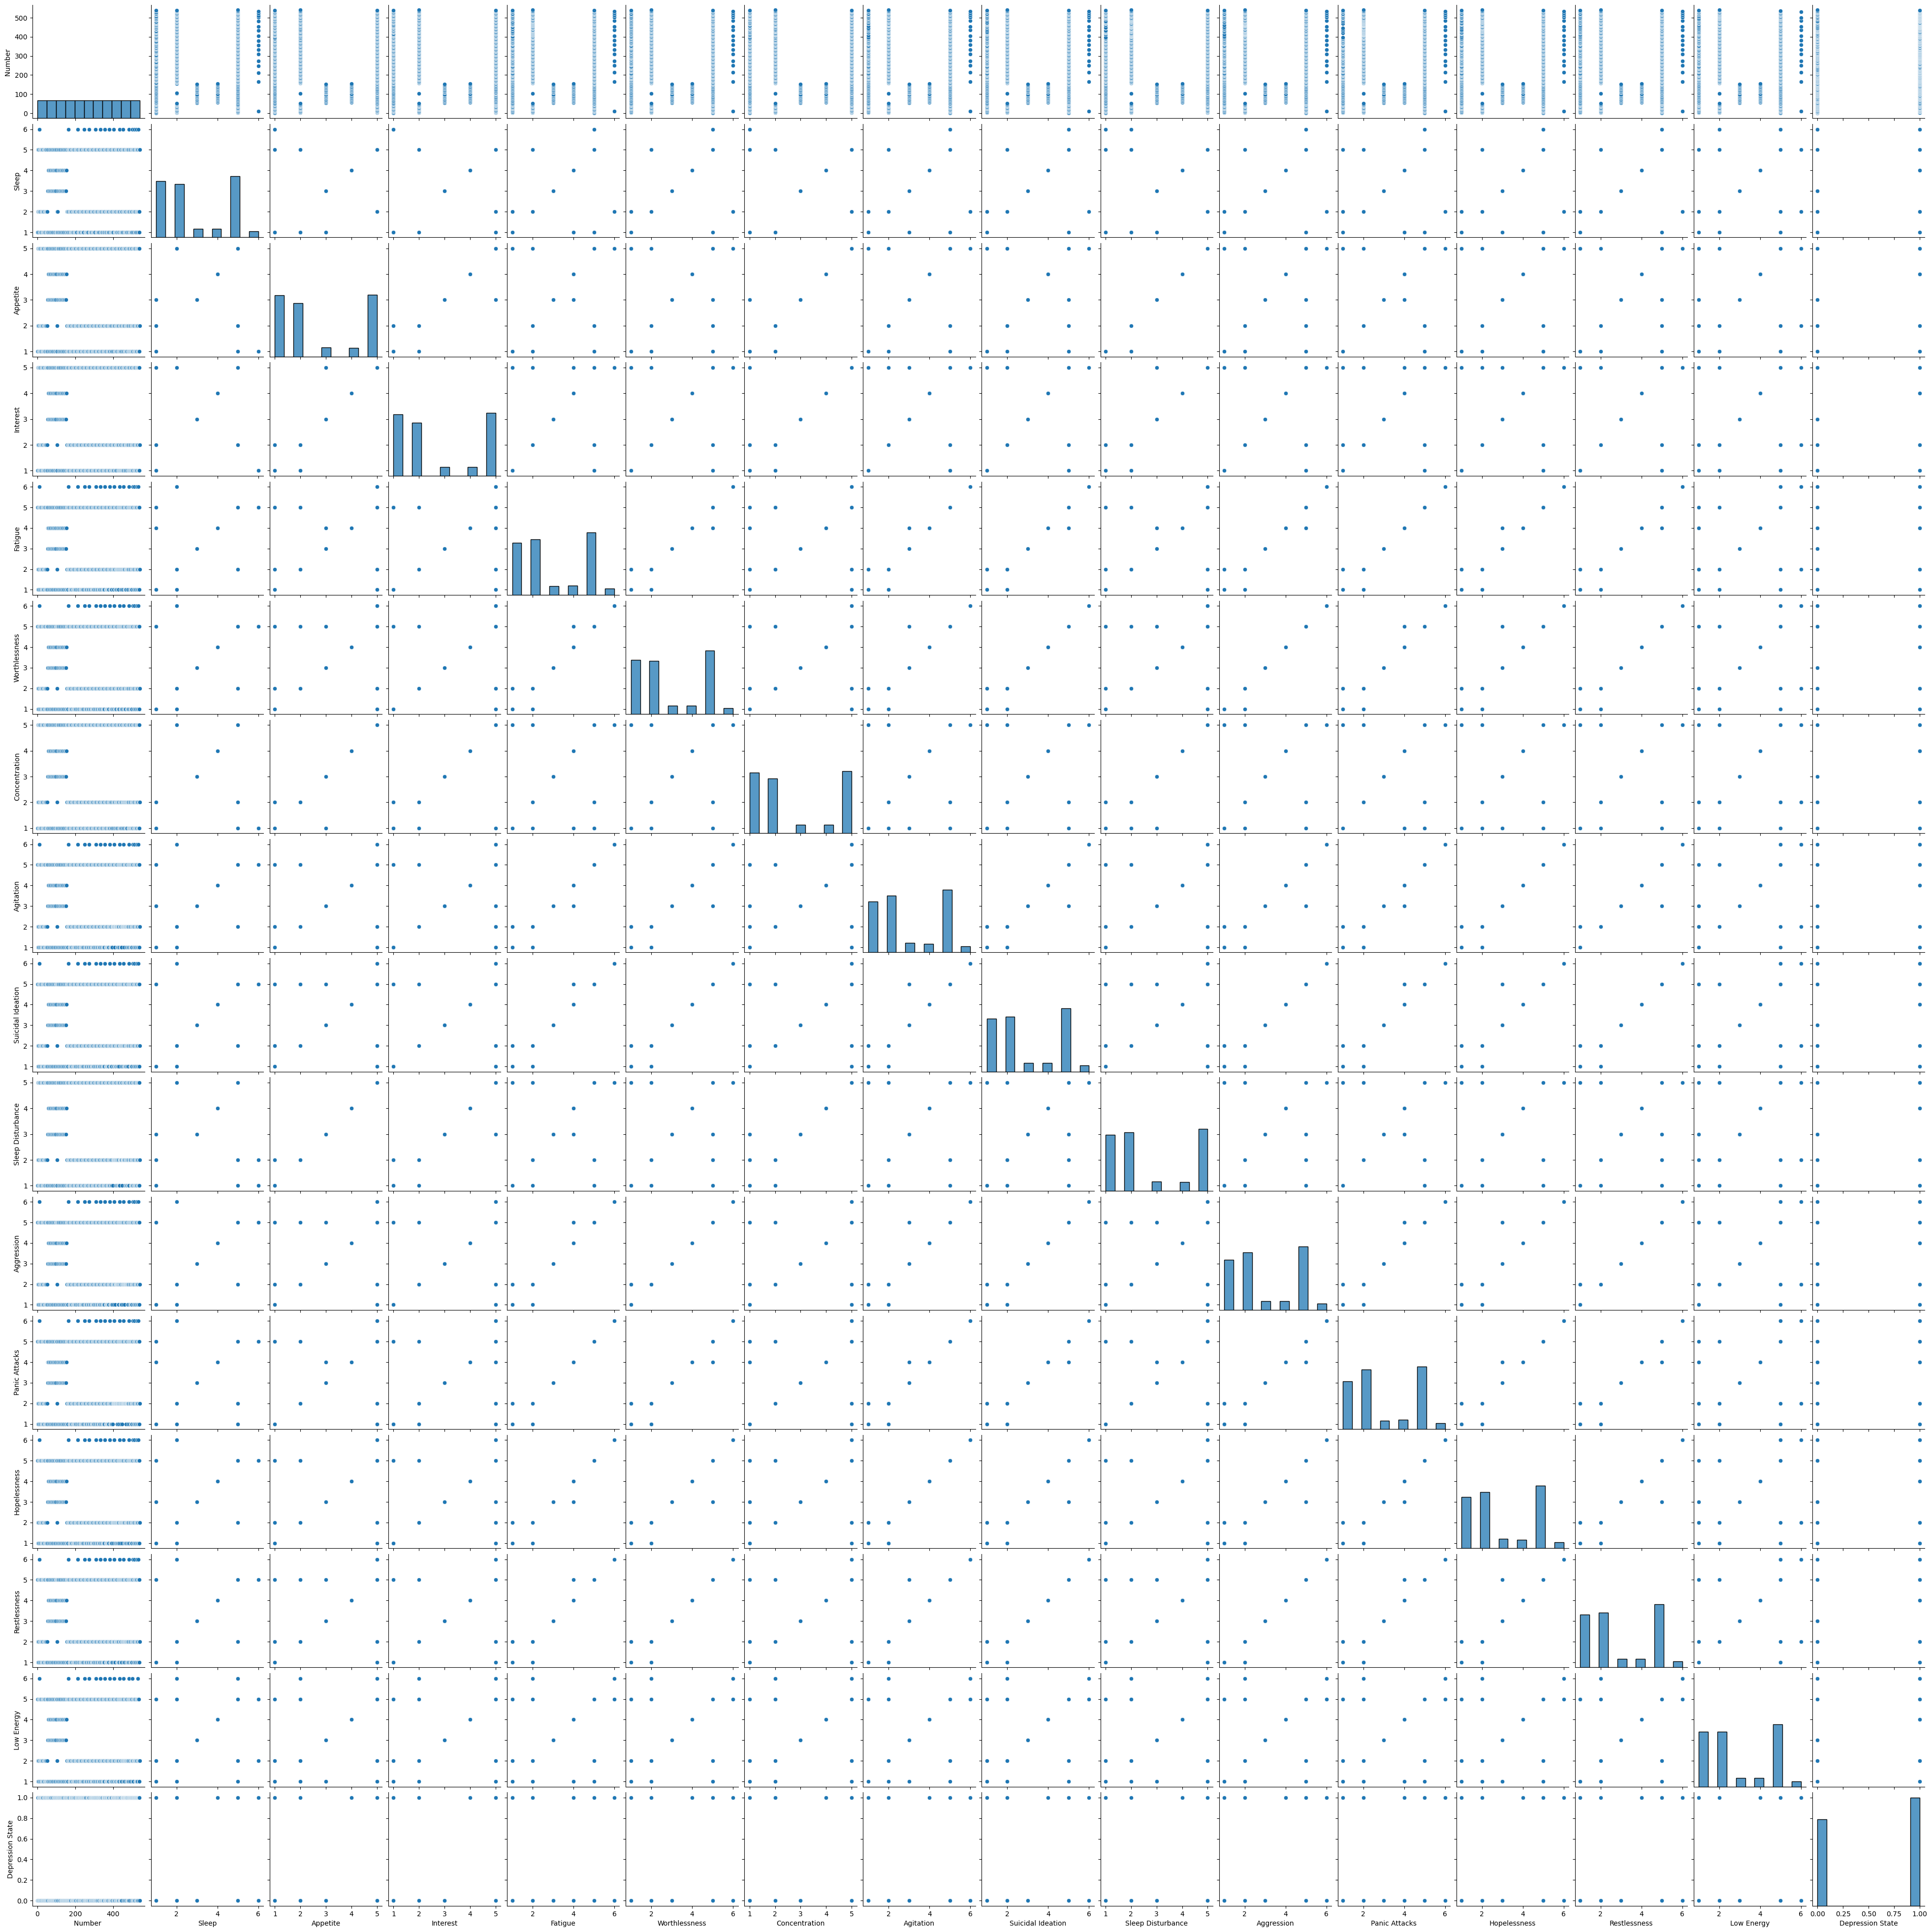

In [121]:
sns.pairplot(df)

In [124]:
col=['Depression State','Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy']

In [125]:
dff=df[col]

In [126]:
dff.corr()

,Depression State,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy
Depression State,1.000000,-0.115633,-0.085338,-0.087776,-0.000960,-0.004764,-0.080992,0.011808,-0.007411,-0.085874,0.000241,0.008492,0.007697,0.001195,-0.050154
Sleep,-0.115633,1.000000,0.017551,0.017715,-0.195636,-0.193198,0.017574,-0.196377,-0.196141,0.006946,-0.202111,-0.208419,-0.194885,-0.196141,-0.182634
Appetite,-0.085338,0.017551,1.000000,0.994746,-0.414216,-0.419400,0.996031,-0.410577,-0.415234,0.995513,-0.406849,-0.396385,-0.412680,-0.415234,-0.306502
Interest,-0.087776,0.017715,0.994746,1.000000,-0.414076,-0.416679,0.985510,-0.413030,-0.412540,0.990178,-0.404210,-0.397665,-0.415110,-0.412540,-0.314272
Fatigue,-0.000960,-0.195636,-0.414216,-0.414076,1.000000,0.996332,-0.412197,0.993143,0.996290,-0.400767,0.996299,0.995116,0.995017,0.995051,0.869691
Worthlessness,-0.004764,-0.193198,-0.419400,-0.416679,0.996332,1.000000,-0.419955,0.993269,0.997556,-0.406082,0.996425,0.991580,0.993869,0.997556,0.868107
Concentration,-0.080992,0.017574,0.996031,0.985510,-0.412197,-0.419955,1.000000,-0.405964,-0.415784,0.991473,-0.407388,-0.394313,-0.408079,-0.415784,-0.296638
Agitation,0.011808,-0.196377,-0.410577,-0.413030,0.993143,0.993269,-0.405964,1.000000,0.991947,-0.397038,0.993127,0.995661,0.996874,0.995680,0.872934
Suicidal Ideation,-0.007411,-0.196141,-0.415234,-0.412540,0.996290,0.997556,-0.415784,0.991947,1.000000,-0.401866,0.993847,0.991424,0.993809,0.996297,0.866464
Sleep Disturbance,-0.085874,0.006946,0.995513,0.990178,-0.400767,-0.406082,0.991473,-0.397038,-0.401866,1.000000,-0.393379,-0.382716,-0.399166,-0.401866,-0.293967


In [127]:
col=['Sleep', 'Appetite', 'Interest',
       'Concentration', 'Agitation', 'Sleep Disturbance', 'Panic Attacks', 'Hopelessness',
       'Low Energy']

In [128]:
dff

,Depression State,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy
0,0.0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0
1,0.0,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0
2,1.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,1.0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0
4,0.0,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.0,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,5.0
536,1.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
537,1.0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,2.0
538,1.0,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0


In [129]:
dff=df[col] # checking if inputs are co-linear to each other or not?
dff.corr()

,Sleep,Appetite,Interest,Concentration,Agitation,Sleep Disturbance,Panic Attacks,Hopelessness,Low Energy
Sleep,1.000000,0.017551,0.017715,0.017574,-0.196377,0.006946,-0.208419,-0.194885,-0.182634
Appetite,0.017551,1.000000,0.994746,0.996031,-0.410577,0.995513,-0.396385,-0.412680,-0.306502
Interest,0.017715,0.994746,1.000000,0.985510,-0.413030,0.990178,-0.397665,-0.415110,-0.314272
Concentration,0.017574,0.996031,0.985510,1.000000,-0.405964,0.991473,-0.394313,-0.408079,-0.296638
Agitation,-0.196377,-0.410577,-0.413030,-0.405964,1.000000,-0.397038,0.995661,0.996874,0.872934
Sleep Disturbance,0.006946,0.995513,0.990178,0.991473,-0.397038,1.000000,-0.382716,-0.399166,-0.293967
Panic Attacks,-0.208419,-0.396385,-0.397665,-0.394313,0.995661,-0.382716,1.000000,0.995079,0.865539
Hopelessness,-0.194885,-0.412680,-0.415110,-0.408079,0.996874,-0.399166,0.995079,1.000000,0.871862
Low Energy,-0.182634,-0.306502,-0.314272,-0.296638,0.872934,-0.293967,0.865539,0.871862,1.000000


#  Data Aggregation & Representation

In [169]:
col=['Sleep', 'Appetite', 'Interest',
       'Concentration', 'Agitation', 'Sleep Disturbance', 'Panic Attacks', 'Hopelessness',
       'Low Energy']
X=df[col]
y=df['Depression State']

array([0., 1.])

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [186]:
from sklearn.preprocessing import StandardScaler
sca = StandardScaler()
X_train = sca.fit_transform(X_train)
X_test = sca.transform(X_test)

# Data analysis

In [193]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')#, decision_function_shape='ovr')  # 'ovr' stands for one-vs-rest

# Train the SVM model
clf.fit(X_train, y_train)

# Cross-validation to evaluate the model
scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Cross-Validation Accuracy: {scores.mean():.2f}')

# Predict on the training data (for demonstration)
y_pred = clf.predict(X_test)

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Cross-Validation Accuracy Scores: [0.84375 0.8625  0.8625  0.8625  0.875  ]
Mean Cross-Validation Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        93
           1       0.90      0.80      0.85       107

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200

Confusion Matrix:
 [[83 10]
 [21 86]]


In [192]:
efficency=1-(31)/(86+83+31)
print("your model efficency is:-",round(efficency,2))

your model efficency is:- 0.84


# Data visualization

In [ ]:
plt.hist(x=dff['Sleep'])#Sleep	Appetite	Interest	Concentration	Agitation	Sleep Disturbance	Panic Attacks	Hopeles

(array([170.,   0., 148.,   0.,   0.,  26.,   0.,  24.,   0., 172.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

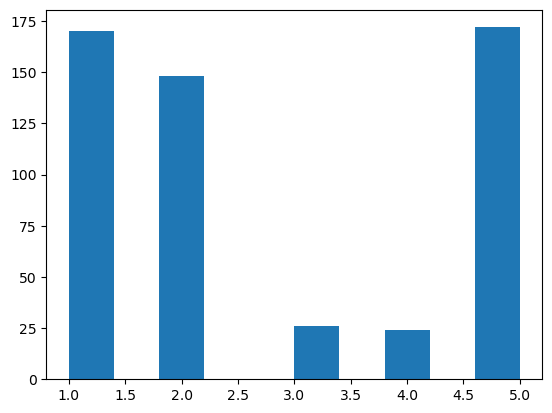

In [80]:
plt.hist(x=dff['Appetite'])

(array([170.,   0., 148.,   0.,   0.,  24.,   0.,  24.,   0., 174.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

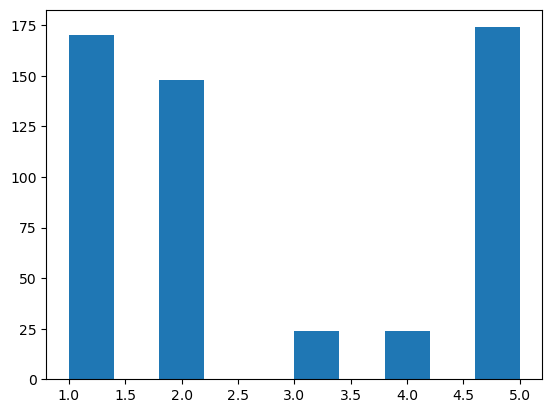

In [81]:
plt.hist(x=dff['Interest'])

(array([168.,   0., 152.,   0.,   0.,  24.,   0.,  24.,   0., 172.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

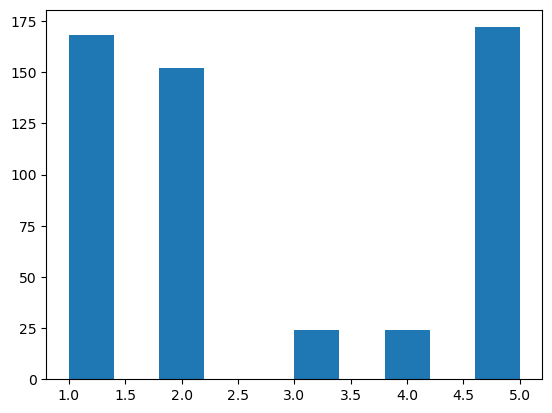

In [82]:
plt.hist(x=dff['Concentration'])

(array([141.,   0., 158.,   0.,  26.,   0.,  24.,   0., 174.,  17.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

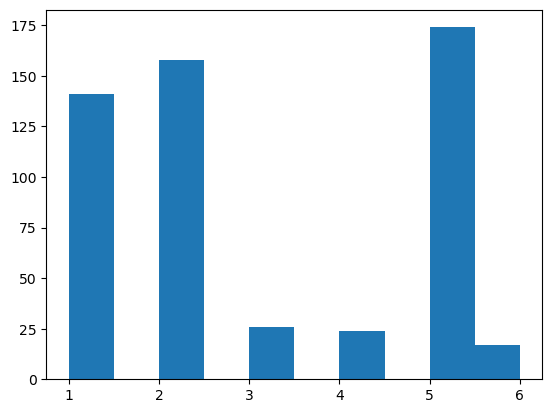

In [83]:
plt.hist(x=dff['Agitation'])

(array([156.,   0., 162.,   0.,   0.,  26.,   0.,  24.,   0., 172.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

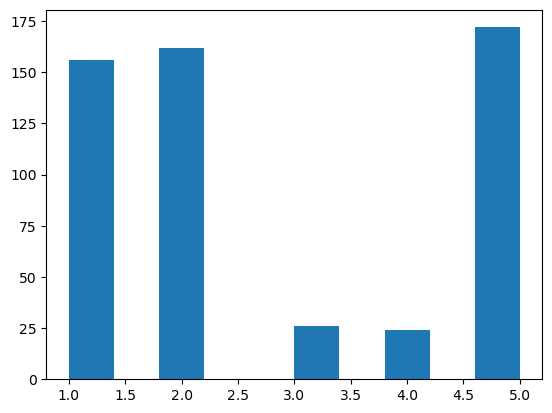

In [84]:
plt.hist(x=dff['Sleep Disturbance'])

(array([133.,   0., 166.,   0.,  24.,   0.,  26.,   0., 174.,  17.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

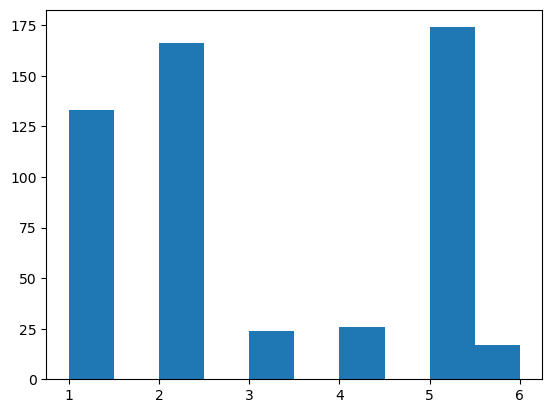

In [86]:
plt.hist(x=dff['Panic Attacks'])

(array([170.,   0., 148.,   0.,   0.,  24.,   0.,  24.,   0., 174.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

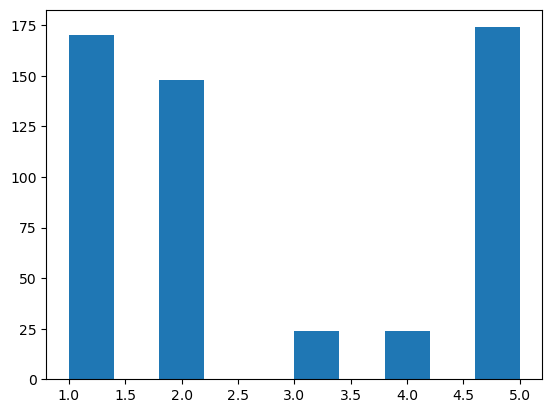

In [85]:
plt.hist(x=dff['Interest'])

# Implementation

In [ ]:
# we can use the this model to predict the depression of people who are working on criticle zone like Hospital, Pilot and Driving and Teaching